**Wykresy scatter, hexbin i area**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [3]:
autos = pd.read_csv('C:/Users/Mariusz Baran/Data_Science_kurs/Data_science_pliki/course-files/autos.csv',
                   encoding='latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Przygotowanie danych

In [4]:
import re
regex = re.compile('.*toyota.*corolla.*', re.IGNORECASE)
filter1 = autos['name'].apply(lambda x: bool(regex.search(x)))
filter2 = autos['price'] <12000
filter3 = autos['yearOfRegistration'] >= 1990
tc = autos[filter1 & filter2 & filter3]

In [5]:
import re
regex = re.compile('.*Audi.*a4.*', re.IGNORECASE)
filter1 = autos['name'].apply(lambda x: bool(regex.search(x)))
filter2 = autos['price'] <12000
filter3 = autos['yearOfRegistration'] >= 1990
audi = autos[filter1 & filter2 & filter3]

In [6]:
tc.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
861,2016-03-07 13:46:32,Toyota_Corolla_1.6_Combi_Sol,privat,Angebot,1800,control,kombi,2003,manuell,110,corolla,150000,6,benzin,toyota,ja,2016-03-07 00:00:00,0,53347,2016-03-10 10:46:17
912,2016-03-27 23:53:18,Toyota_Corolla_Verso_2.2_D_CAT_DPF_Executive,privat,Angebot,5300,test,bus,2008,manuell,177,verso,150000,1,diesel,toyota,nein,2016-03-27 00:00:00,0,63128,2016-04-06 09:15:32
1898,2016-03-22 20:52:00,Toyota_Corolla,privat,Angebot,3200,control,kleinwagen,2004,manuell,1398,corolla,5000,6,benzin,toyota,nein,2016-03-22 00:00:00,0,22043,2016-03-22 21:43:26
2264,2016-03-12 23:47:09,Toyota_Corolla_1.6_VVT_i_Combi_Sol,privat,Angebot,2990,control,kombi,2004,manuell,110,corolla,150000,8,benzin,toyota,nein,2016-03-12 00:00:00,0,16540,2016-03-31 06:47:04
2386,2016-03-10 14:48:16,Toyota_Corolla_Verso_2.2_D_CAT_Sol,privat,Angebot,5900,test,bus,2006,manuell,177,verso,150000,8,diesel,toyota,nein,2016-03-10 00:00:00,0,57072,2016-03-14 11:45:36


In [7]:
audi.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
103,2016-03-15 17:41:31,Audi_A4_B5_1_6_Liter,privat,Angebot,499,control,limousine,1995,manuell,101,a4,150000,5,benzin,audi,NaN,2016-03-15 00:00:00,0,85414,2016-03-22 20:48:22
105,2016-04-01 09:54:39,Audi_a4_2.5_TDI_Tausch_moeglich,privat,Angebot,6500,test,limousine,2004,manuell,163,a4,150000,4,diesel,audi,NaN,2016-04-01 00:00:00,0,97450,2016-04-01 09:54:39
147,2016-03-14 12:46:46,Audi_A4_b5_Avant_TÜV_10/17,privat,Angebot,1500,test,kombi,1996,manuell,126,a4,150000,0,NaN,audi,nein,2016-03-14 00:00:00,0,24873,2016-03-17 00:45:29
316,2016-03-19 10:54:59,Audi_A4_Cabriolet_3.0,privat,Angebot,5299,test,cabrio,2002,manuell,220,a4,150000,4,benzin,audi,nein,2016-03-19 00:00:00,0,80999,2016-04-02 14:46:07
408,2016-03-20 23:45:11,Audi_A4_1.8,privat,Angebot,2700,control,limousine,1999,manuell,125,a4,125000,7,benzin,audi,nein,2016-03-20 00:00:00,0,57072,2016-04-07 09:45:41


Wykres typu scatter

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

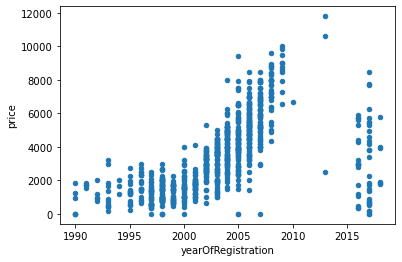

In [8]:
tc.plot(kind='scatter', x='yearOfRegistration', y='price')

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

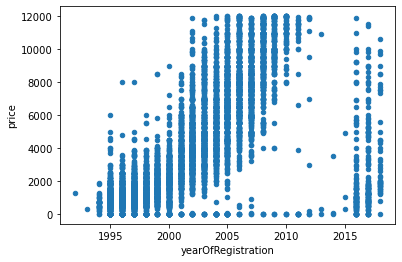

In [9]:
audi.plot(kind='scatter', x='yearOfRegistration', y='price')

Można połączyć dwa wykresy - metoda ax

<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

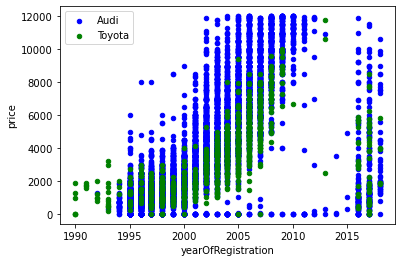

In [10]:
ax = audi.plot.scatter(x='yearOfRegistration', y='price', color='Blue', label='Audi')
tc.plot.scatter(x='yearOfRegistration', y='price', color='Green', label='Toyota', ax=ax)

Wykres hexbin

<AxesSubplot:title={'center':'Audi'}, xlabel='yearOfRegistration', ylabel='price'>

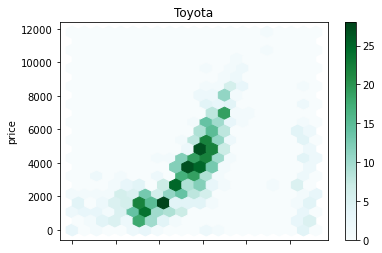

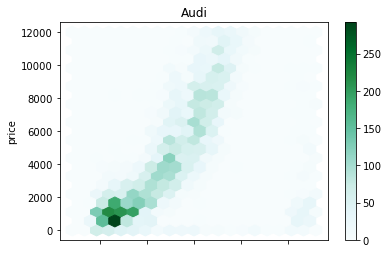

In [11]:
tc.plot(kind='hexbin', x='yearOfRegistration', y='price', gridsize=20, title='Toyota')
audi.plot(kind='hexbin', x='yearOfRegistration', y='price', gridsize=20, title='Audi')

In [13]:
tc_counts = tc['yearOfRegistration'].value_counts().sort_index()
tc_counts.head()

1990     6
1991     4
1992     5
1993    12
1994     3
Name: yearOfRegistration, dtype: int64

In [14]:
audi_counts = audi['yearOfRegistration'].value_counts().sort_index()
audi_counts.head()

1992      1
1993      1
1994     39
1995    458
1996    609
Name: yearOfRegistration, dtype: int64

In [25]:
car_counts = pd.DataFrame(index=tc_counts.index.append(audi_counts.index).unique())
car_counts['Toyota'] = tc_counts
car_counts['Audi'] = audi_counts
car_counts.head()

,Toyota,Audi
1990,6.0,NaN
1991,4.0,NaN
1992,5.0,1.0
1993,12.0,1.0
1994,3.0,39.0


<AxesSubplot:>

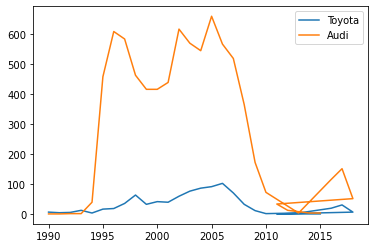

In [26]:
car_counts.fillna(0, inplace=True)
car_counts.sort_index
car_counts.plot()

Wykres area

<AxesSubplot:>

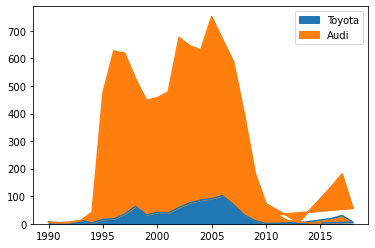

In [27]:
car_counts.plot(kind='area')